### Instructions: 
Ideally, every functions input-output spec should be in a comment. If the code is big, the purpose of every relevant smaller for/while loop should be annotated.


#### Problem 1. (15 points)
Implement the DIVIDE algorithm in the Lecture 3 module with the following changes.
* Your code takes input the two numbers in decimal notation instead of the binary notation. DONE
* You are going to calculate your “running time” as follows: any time your code adds or subtracts two numbers a and b, it costs max(Na, Nb) where Na and Nb are the number of digits in a and b.
* However, when an even number is incremented by 1, in that case the “running time” is only 1 (even if the even number has many digits).
* Multiplying by 2, or dividing by 2 and taking floors, is not to be counted in your “running time”.
* You should output, along with the quotient and the remainder, the total “running time” of your code.

To give an example, if we call DIVIDE(5, 2) it calls DIVIDE(2, 2) which returns (1, 0), which becomes (2,0) in the call of DIVIDE, and since 5 is odd, we increment it to (2,1). The final increment step costs 1-unit, and this is the total time. As another example, if you call DIVIDE(21, 15) it calls DIVIDE (10, 15) which returns (0, 10); this becomes (0, 20) upon doubling, and since 21 is odd, we increment it to (0, 21). This increment costs 1 unit. 21 > 15, thus, we subtract 21 − 15 to get 6. This subtraction costs 2 units since both 21 and 15 are 2 digits. And, the quotient is incremented, and this costs another 1 unit of time. Thus, the final answer is (1, 6) and the total time is 1 + 2 + 1 = 4 units.
What is the answer when run with (30294982, 2124234)?

In [1]:
# NEED TO ADD the runtime parts

# procedure DIVIDE (x, y):
# takes numbers in decimal notation instead of binary notation!!!
# procedure divide where x is the number being divided and y is the divisor
# returns quotient, remainder, and total "runtime"
# each time it adds or subtracts two numbers a b, it costs max(Na, Nb) <-- Na, Nb = # digits in a, b
import math

# rt -- runtime variable stores each subcomponent of the runtime -- when incrementing, should do a plus equals so
# it works recursively
# TODO -- explain inputs/outputs for function
# TODO -- preconditions and postconditions

# input x = dividend, input x = the divisor, input rt = the run time, with default value 0

def divide(x, y, rt = 0):
    # base case 1 -- if divisor is less than dividend, return quotient = 0 and the remainder, i.e., the dividend.
    if x < y :
        return (0, x, rt)
    # base case 2 -- if number is equal to divisor, return quotient = 1 and the remainder = 0
    if x == y : 
        return (1, 0, rt)
    # we find x2
    x2 = math.floor(x/2)
    # recursive call
    q2, r2, rt = divide(x2, y)
    # set r and q to two times the remainder and quotient returned from recursive call
    q = 2 * q2
    r = 2 * r2
    if (x % 2 != 0) :
        # TODO -- this is an uneven number
        # when an even number is incremented by 1, the "runtime" is 1
        r = r + 1
        #increment up runtime by 1
        rt += 1
    if r >= y :
        # increment runtime by max of number of digits in numbers being combined
        q = q + 1
        # q will always be greater or equal because we check the basecases
        rt += len(str(q))
        # increment runtime by max of number of digits in numbers being subtracted
        r = r - y
        rt += max(len(str(r)), len(str(y)))
    return (q, r, rt)

In [2]:
divide(21, 15)

(1, 6, 4)

In [3]:
divide(20, 4)

(5, 0, 5)

In [4]:
divide(19,6)

(3, 1, 6)

#### PROBLEM 1 CITATIONS: 
Adapted from divide algorithm shown in Division video on canvas. 

#### Problem 2. (25 points)
For a positve integer n, define An to be the array of single-digit non-negative integers containing the first
n digits of π. So A1 = [3], A2 = [3,1], and so on. To remind you, the digits of π can be found on Canvas. In this assignment, we want to figure out the number of inversions in the array An. For this assignment, we are asking you to measure actual running time of your machine. For this, we suggest you import time and then time.time() returns the time past since a certain fixed point of time (Google this to find more). More importantly, taking a difference between two snapshots, one before a run of a function and one after, gives you a very good estimate of how long (in seconds) the function took.

a. Implement the naive algorithm for counting inversions which goes over all pairs and just counts the number of inversions. (5 points)

b. Implement the fastest counting inversions algorithm done in class/found in lecture notes.(15 points)

c. Next, plot the following. On the x-axis, you have the numbers n going from 1 to 5000 increasing in jumps of 100. On the y-axis is the time taken by the two above implementations, part (a) and part (b),
to count the number of inversions in the array An. (5 points)
*After plotting the above two, make a solemn promise to yourself that you will think twice before coding
a brute-force time algorithm *

What is the number of inversions in A1000000, that is, what is the number of inversions in the first million
digits of π?

*The digits of π look pretty random. Assuming this, even before you code, do you have a guess of the ball- park in which the number of inversions should lie in? Later on, check if the answer you get lies in that ball park? If not, check your code.*


In [5]:
# this helper function reads the n first numbers of pi and returns a list containing these
# the function was given on canvas

def read_pi(n):
    #opens the file name "pi" and reads the first n digits
    #puts it in the list pi, and returns that list
    pi = list()
    f = open('pi','r')
    for i in range(n):
        d = f.read(1)
        pi.append(int(d))
    return pi

In [6]:
# naive algorithm
# count_inversions_naive(A)

# input: array A
# output: array A and count of inversions in A
# size: n, the size of the array

In [7]:
import time

def count_inversions_naive(A):
    n = len(A); count = 0
    # base case 1
    # -- if the length of the array is 0 or 1, there are no inversions
    if n == (0 or 1):
        return 0
    else:
        time_val = time.time()
        print("run time before entering loop: ", time_val - time_val)
        # this loop iterates over all elements in A
        for i in range(0, n):
            # this loop compares A[i] with all the rest of the elements in A
            for j in range(1, n):
                # checks if there is an inversion and increments count when true
                if  ((i < j) and (A[i] > A[j])):
                    count += 1
        print("run time after entering loop: ", time.time() - time_val )
        return A, count

In [11]:
A = read_pi(20)
count_inversions_naive(A)

run time before entering loop:  0.0
run time after entering loop:  0.0009741783142089844


([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4], 67)

In [12]:
# fastest counting inversions algorithm
# sort_and_count
   # combine
   # count_cross_inv

# input: an Array A[1:n]
# output: the number of inversions in A
# size: n, the size of the array


In [13]:
def combine(P, Q):
    R = []
    # P and Q are sorted; outputs R a sorted array of elements in P and Q
    i = 0; j = 0; k = 0;
    while (i < len(P) and j < len(Q)):
        if (P[i] <= Q[j]):
            R.append(P[i])
            i += 1
        else:
            R.append(Q[j])
            j += 1;
        k += 1
    if (i > (len(P) - 1)):
        while (j < len(Q)):
            R.append(Q[j])
            j += 1
    else:
        while (i < len(P)):
            R.append(P[i])
            i += 1
    return R

In [14]:
combine([1,2,4],[10,200, 300, 400])

[1, 2, 4, 10, 200, 300, 400]

In [15]:
def count_cross_inv(P, Q):
    # P and Q are sorted arrays; outputs the number of (i,j) with P[i]>Q[j]
    i = 0; j = 0; num = 0
    p = len(P); q = len(Q)
    while (i < p) and (j < q):
        if (P[i] > Q[j]):
            num = num + p - i
            j += 1
            #break
        else:
            i += 1
    return num;

In [16]:
count_cross_inv([1,3,5, 6,7],[2,8])

4

In [17]:
import numpy as np
import math
def sort_and_count(A):
# returns (b, i) where B = sort(A) and I is the number of inversions in A[1:n]
    if (len(A) <= 1):
        return (A, 0) #singleton array
    m = math.floor(len(A)/2)
    (b1, i1) =  sort_and_count(A[0:m])
    (b2, i2) =  sort_and_count(A[m:])
    c = count_cross_inv(b1, b2)
    b = combine(b1, b2)
    return (b, i1 + i2 + c)

In [18]:
A = read_pi(20);

print(sort_and_count(A))


([1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 6, 7, 8, 8, 9, 9, 9], 67)


On the x-axis, you have the numbers n going from 1 to 5000 increasing in jumps of 100. On the y-axis is the time taken by the two above implementations, part (a) and part (b), to count the number of inversions in the array An. (5 points) *After plotting the above two, make a solemn promise to yourself that you will think twice before coding a brute-force time algorithm *

In [19]:
# want to create table that loops through
# each number from 1 - 5000, increasing by 100
# puts into table, as 
import pandas as pd

cols = ['naive', 'fast']
df2 = pd.DataFrame(columns=cols, index=range(0, 5001, 100))
for a in range(0, 5001, 100):
    df2.loc[a].naive = count_inversions_naive(read_pi(a))[1]
    df2.loc[a].fast = sort_and_count(read_pi(read_pi(a)))[1]

run time before entering loop:  0.0
run time after entering loop:  0.0


TypeError: 'list' object cannot be interpreted as an integer

In [21]:
count_inversions_naive(read_pi(20))


run time before entering loop:  0.0
run time after entering loop:  0.0


([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4], 67)

In [ ]:
print(df2)

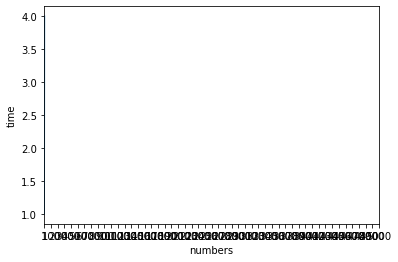

In [5]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.xlabel('numbers')
plt.xticks([1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000])
plt.ylabel('time')
plt.show()

In [ ]:
import seaborn as sns
sns.set_theme()


In [ ]:
def convert_list_to_int(L):
    #Takes a list of single digit integers and makes it into one single integer read left to write
    #Again, it makes a string concatenating the whole list
    #and then uses the int() function
    s = ""
    for i in L:
        s = s + str(i)
    return int(s)

In [ ]:
def read_countries():
    #opens the file named "country.txt" 
    #returns a list of all countries which are 7 letters or more (counting spaces)
    #all lower case
    countries = list()
    with open("countries.txt") as file:
        for line in file: 
            line = line.strip() #or some other preprocessing
            if(len(line) > 6):
                c = line.lower()    
                countries.append(c)
    return countries

In [20]:
def convert_int_to_list(N):
    #takes a number N and makes a list with its single digits
    #Example: it takes 1729 and forms [1,7,2,9]
    L = list()
    s = str(N) #make N into a string
    for i in s:
        L.append(int(i))
    return L
    #The above can be succinctly written as "return [int(i) for i in str(N)]" 
    #That would be much faster